In [1]:
import numpy as np

# create 3-dim data
data_1 = np.array([[-1.5, 2.0, 5.0],
            [-2.0, -2.0, 0.0],
            [1.0, 1.0, 2.0],
            [1.5, 1.5, 1.2],
            [1.0, 2.0, 5.6],
            [1.0, -2.0, -2.0],
            [1.0, -3.0, -2.0],
            [1.0, -2.5, -4.5]])

# create random data set
np.random.seed(0)
training_data = np.random.rand(100, 2)

# input variable: data, size_codebook, epsilon
data = training_data
size_codebook = 8
epsilon = 0.00001
verbose = True

# main function

In [29]:
# function body

# para: data, size: (n, d), n examples, d dimension
# para: size_codebook, int,
# para: verbose, if print results

# function starts
global _n_data, _dim_data
_n_data, _dim_data = data.shape

# initialization
codebook = []
codebook_abs_weights = [_n_data]
codebook_rel_weights = [1]

# initialize codevector with mean of all inputs
c0 = np.mean(data, axis=0)

# add code vector into the codebook
codebook.append(c0)

# calculate distortion
avg_dist_c0 = distortion_c0(c0, data)

# me: split code vectors until we have enough(size_codebook)
while len(codebook) < size_codebook:

    # step: split code vector
    codebook = split_codebook(codebook, epsilon)

    # update
    len_codebook = len(codebook)# length of current code book
    codebook_abs_weights = np.zeros(len_codebook)
    codebook_rel_weights = np.zeros(len_codebook)

    # Step: minimize distortion

    # initialization
    avg_dist = 0
    err = epsilon + 1
    # num_iter = 0

    # for fixed length of code book, iterate untill converge
    while err > epsilon:


        # initialization - list recording the nearest code vector for each input data(vector)
        closest_c_list = [None] * _n_data

        # initialization - dict mapping code vector index -> input data(vector), the key is index, the value is ndarray of data(vector)
        vecs_near_c = defaultdict(list)

        # step: cluster feature vectors, where we find the closest code vector for all input data(vector)

        # calculate euclidean distance between each input vector and code vector
        # element (i,j) represent distance between input vector i and code vector j
        dist = distance.cdist(data, np.array(codebook))
        closest_c = np.argmin(dist, axis=1)

        # get the minimum index of code vector for each input vector, and record
        # closest_c_idx_list = closest_c.tolist()

        # get the series of closest input vector idx for each code vector
        closest_c_seris = pd.Series(closest_c)

        # for each code vector index
        for codevec_idx in closest_c_seris.unique():

            # get list of input vector idx closest to a code vector
            list_input_idx = closest_c_seris[closest_c_seris==codevec_idx].index.tolist()

            # get list of input vector closest to a code vector
            list_input = data[list_input_idx]

            # add the list of input vector to vecs_near_c
            vecs_near_c[codevec_idx] = list_input

        # step: find centroid and update code book
        codebook, codebook_abs_weights, codebook_rel_weights = update_codebook(len_codebook, vecs_near_c, codebook, codebook_abs_weights, codebook_rel_weights)

        # step: compute Distortion and new err value
        avg_dist_prev = avg_dist if avg_dist > 0 else avg_dist_c0
        avg_dist = calculate_distance(closest_c, codebook, data)
        err = (avg_dist_prev - avg_dist) / avg_dist_prev

        # print results
        if verbose==True:
            print(f'iteration: {num_iter}, size codebook: {len_codebook}, average distance: {avg_dist.item():.3f}, previous average distance: {avg_dist_prev.item():.3f}, err: {err.item():.3f}')


        num_iter += 1

iteration: 20, size codebook: 2, average distance: 0.302, previous average distance: 0.161, err: -0.879
iteration: 21, size codebook: 4, average distance: 0.250, previous average distance: 0.161, err: -0.555
iteration: 22, size codebook: 8, average distance: 0.158, previous average distance: 0.161, err: 0.017
iteration: 23, size codebook: 8, average distance: 0.142, previous average distance: 0.158, err: 0.101
iteration: 24, size codebook: 8, average distance: 0.139, previous average distance: 0.142, err: 0.023
iteration: 25, size codebook: 8, average distance: 0.137, previous average distance: 0.139, err: 0.011
iteration: 26, size codebook: 8, average distance: 0.135, previous average distance: 0.137, err: 0.015
iteration: 27, size codebook: 8, average distance: 0.133, previous average distance: 0.135, err: 0.019
iteration: 28, size codebook: 8, average distance: 0.132, previous average distance: 0.133, err: 0.005
iteration: 29, size codebook: 8, average distance: 0.131, previous aver

In [10]:
# test result for code book size 8
codebook

[array([0.83727388, 0.82562582]),
 array([0.87187314, 0.51250114]),
 array([0.52541837, 0.70824284]),
 array([0.1584384 , 0.78644664]),
 array([0.62234101, 0.33365079]),
 array([0.72525974, 0.08717812]),
 array([0.1847406 , 0.39490445]),
 array([0.25003943, 0.1328859 ])]

In [15]:
# test cell
print('\n codebook:\n')
print(codebook)
print('\n vec_idxs_near_c:\n')
print(vec_idxs_near_c)
print('\n vecs_near_c:\n')
print(vecs_near_c)


 codebook:

[array([0.83727388, 0.82562582]), array([0.87187314, 0.51250114]), array([0.52541837, 0.70824284]), array([0.1584384 , 0.78644664]), array([0.62234101, 0.33365079]), array([0.72525974, 0.08717812]), array([0.1847406 , 0.39490445]), array([0.25003943, 0.1328859 ])]

 vec_idxs_near_c:

defaultdict(<class 'list'>, {2: [0, 1, 2, 3, 6, 11, 16, 18, 22, 44, 53, 55, 62, 67, 68, 71, 93], 1: [4, 5, 35, 36, 57, 58, 60, 61, 70, 78, 92, 97], 7: [7, 23, 27, 30, 38, 39, 47, 79, 86, 95, 98], 3: [8, 12, 13, 15, 17, 41, 45, 46, 54, 73, 75, 76, 77, 88, 90, 96], 0: [9, 10, 19, 51, 59, 72, 74, 81, 82], 4: [14, 25, 28, 29, 42, 50, 56, 64, 65, 69, 80, 91, 94], 6: [20, 24, 32, 40, 52, 63, 66, 83, 99], 5: [21, 26, 31, 33, 34, 37, 43, 48, 49, 84, 85, 87, 89]})

 vecs_near_c:

defaultdict(<class 'list'>, {2: array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411],
       [0.43758721, 0.891773  ],
       [0.56804456, 0.92559664],
       [0.46147936, 0.7805291

In [30]:
closest_c

array([2, 2, 2, 2, 1, 1, 2, 7, 3, 0, 0, 2, 3, 3, 4, 3, 2, 3, 2, 0, 6, 5,
       2, 7, 6, 4, 5, 7, 4, 4, 7, 5, 6, 5, 5, 1, 1, 5, 7, 7, 6, 3, 4, 5,
       2, 3, 3, 7, 5, 5, 4, 0, 6, 2, 3, 2, 4, 1, 1, 0, 1, 1, 2, 6, 4, 4,
       6, 2, 2, 4, 1, 2, 0, 3, 0, 3, 3, 3, 1, 7, 4, 0, 0, 6, 5, 5, 7, 5,
       3, 5, 3, 4, 1, 2, 4, 7, 3, 1, 7, 6], dtype=int64)

# function

## calculate euclidean distance

In [5]:
def calculate_distance(closest_c, codebook, data):
    """
    calculate euclidean distance between codebook and input data
    :param closest_c:
    :param codebook:
    :param data:
    :return:
    """
    total_distance = 0

    for data_idx, codevec_idx in enumerate(closest_c):

        # distance between one input data vector and its code vector
        dist = distance.cdist(np.reshape(data[data_idx], (1, -1)), np.reshape(codebook[codevec_idx], (1, -1)), metric='euclidean')

        # add
        total_distance += dist

    # average
    total_distance /= data.shape[0]

    return total_distance

## update code book

In [6]:
def update_codebook(len_codebook, vecs_near_c, codebook, codebook_abs_weights, codebook_rel_weights):
    """

    :param len_codebook:
    :param vecs_near_c:
    :param codebook:
    :param codebook_abs_weights:
    :param codebook_rel_weights:
    :return:
    """
    # for all code vector index of current codebook
    for codevec_idx, codevec in enumerate(codebook):

        # get the proximity input vectors
        vecs = vecs_near_c.get(codevec_idx, [])

        # number of proximity input vectors
        num_vecs_near_c = len(vecs)

        # update code vector, if it has more than 1 vector of its proximity input vectors
        if num_vecs_near_c > 0:

            # calculate new code vector
            new_codevec = np.mean(vecs, axis=0)

            # update code vector
            codebook[codevec_idx] = new_codevec

            # update weights
            codebook_abs_weights[codevec_idx] = num_vecs_near_c
            codebook_rel_weights[codevec_idx] = num_vecs_near_c / _n_data

    return codebook, codebook_abs_weights, codebook_rel_weights

## split code book

In [7]:
# functions
def split_codebook(codebook, epsilon):
    """
    split code book by adding and subtracting epsilon from original code vector
    :param codebook: input code book, list of code vector(1-dim ndarray), size of each element is (dim_data,)
    :param epsilon: value to be added or subtracted
    :return: new code book, list of code vector(1-dim ndarray)
    """
    # initialize new codebook
    new_codebook = []

    # add and subtract from all original code vector
    for code_vector in codebook:
        new_codebook.append(code_vector + epsilon)
        new_codebook.append(code_vector - epsilon)

    return new_codebook

## distortion

In [8]:

def distortion_c0(c0, data):
    """
    calculate the distortion between initialized codevector(c0) and data set
    :param c0: numpy vector of size (d,)
    :param data: numpy array of size (n, d), with n examples and d dimension
    :return: a value
    """
    n_data = data.shape[0]
    c0 = np.reshape(c0, (1, -1))
    distortion = (1/n_data) * np.sum(np.power(np.linalg.norm(data - c0), 2))
    return distortion

# test algorithm

In [1]:
import lbg

In [2]:
%pwd

'E:\\OneDrive - Northeastern University\\code\\code_nu\\code_nu_CS 6140\\LBG_from_scratch'

In [5]:
# create random data set
import numpy as np
np.random.seed(0)
training_data = np.random.rand(100, 2)

In [6]:
codebook, abs_weights, rel_weights = lbg.generate_codebook(data=training_data, size_codebook=8, epsilon=0.00001, verbose=True)

iteration: 0, size codebook: 2, average distance: 0.302, previous average distance: 0.161, err: -0.879
iteration: 0, size codebook: 4, average distance: 0.250, previous average distance: 0.161, err: -0.555
iteration: 0, size codebook: 8, average distance: 0.158, previous average distance: 0.161, err: 0.017
iteration: 1, size codebook: 8, average distance: 0.142, previous average distance: 0.158, err: 0.101
iteration: 2, size codebook: 8, average distance: 0.139, previous average distance: 0.142, err: 0.023
iteration: 3, size codebook: 8, average distance: 0.137, previous average distance: 0.139, err: 0.011
iteration: 4, size codebook: 8, average distance: 0.135, previous average distance: 0.137, err: 0.015
iteration: 5, size codebook: 8, average distance: 0.133, previous average distance: 0.135, err: 0.019
iteration: 6, size codebook: 8, average distance: 0.132, previous average distance: 0.133, err: 0.005
iteration: 7, size codebook: 8, average distance: 0.131, previous average distan

Text(0, 0.5, 'x2')

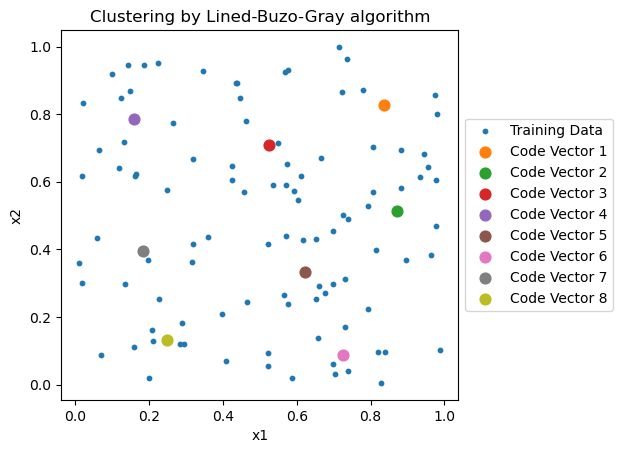

In [8]:
# visualize results
import matplotlib.pyplot as plt

f, ax = plt.subplots()

ax.scatter(training_data[:, 0], training_data[:, 1], label='Training Data', s=10)

for codevec_idx, codevec in enumerate(codebook):
    ax.scatter(codevec[0], codevec[1], label=f'Code Vector {codevec_idx+1}', s=60)

# adjust legend
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_title('Clustering by Lined-Buzo-Gray algorithm')
ax.set_xlabel('x1')
ax.set_ylabel('x2')